# NOAA

In [36]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
%matplotlib inline

In [68]:
noaa_raw = pd.read_csv('ch4_mm_gl (1).txt', comment='#', delim_whitespace=True)

In [69]:
ch4 = np.array(noaa_raw.average)

In [70]:
time = pd.date_range(start = '7/1/1983', end = '8/1/2019', freq = '1M')

In [73]:
ch4_noaa = xr.DataArray(np.zeros(time.size), [('time', time)],\
                        attrs={'units':'ppb','description': 'CH4 observation data from NOAA'}, name = 'ch4')
ch4_noaa[:] = ch4
DS = ch4_noaa.to_dataset(name = 'ch4')
DS.to_netcdf('ch4_noaa.nc')

AttributeError: module 'dask' has no attribute 'base'

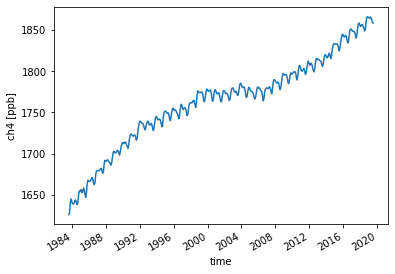

In [78]:
ch4_noaa.plot()

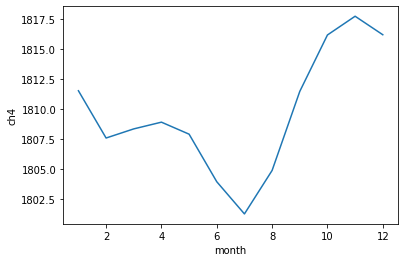

In [80]:
ch4_noaa.sel(time = slice('1/2010','1/2015')).groupby('time.month').mean('time').plot()

## rest is Shanice

In [3]:
noaa_clean = noaa_raw.drop(columns='decimal').sort_values(['year', 'month'], ascending=True).set_index('year')
noaa_clean

,month,average,average_unc,trend,trend_unc
year,,,,,
1983,7,1625.9,2.5,1634.6,1.6
1983,8,1628.0,3.1,1635.2,1.5
1983,9,1638.4,2.5,1635.9,1.4
1983,10,1644.8,1.6,1636.6,1.4
1983,11,1642.6,0.7,1637.4,1.3
...,...,...,...,...,...
2019,3,1866.0,-9.9,1864.4,-9.9
2019,4,1865.1,-9.9,1865.3,-9.9
2019,5,1862.2,-9.9,1866.3,-9.9


In [4]:
noaa_raw['year'].shape

(433,)

In [5]:
noaa_clean['month'].shape

(433,)

In [6]:
time_df = pd.DataFrame({'year': noaa_raw['year'].values,
              'month': noaa_clean['month'].values,
              'day': np.ones(433,)})

In [7]:
time = pd.to_datetime(time_df)
time

0     1983-07-01
1     1983-08-01
2     1983-09-01
3     1983-10-01
4     1983-11-01
         ...    
428   2019-03-01
429   2019-04-01
430   2019-05-01
431   2019-06-01
432   2019-07-01
Length: 433, dtype: datetime64[ns]

In [8]:
time_pdseries = time.to_frame(name='time')
time_pdseries.head(4)

,time
0,1983-07-01
1,1983-08-01
2,1983-09-01
3,1983-10-01


In [9]:
time_pdseries.time

0     1983-07-01
1     1983-08-01
2     1983-09-01
3     1983-10-01
4     1983-11-01
         ...    
428   2019-03-01
429   2019-04-01
430   2019-05-01
431   2019-06-01
432   2019-07-01
Name: time, Length: 433, dtype: datetime64[ns]

In [10]:
noaa_xr = xr.Dataset.from_dataframe(noaa_clean)
noaa_xr

<xarray.Dataset>
Dimensions:      (year: 433)
Coordinates:
  * year         (year) int64 1983 1983 1983 1983 1983 ... 2019 2019 2019 2019
Data variables:
    month        (year) int64 7 8 9 10 11 12 1 2 3 4 ... 10 11 12 1 2 3 4 5 6 7
    average      (year) float64 1.626e+03 1.628e+03 ... 1.86e+03 1.859e+03
    average_unc  (year) float64 2.5 3.1 2.5 1.6 0.7 ... -9.9 -9.9 -9.9 -9.9 -9.9
    trend        (year) float64 1.635e+03 1.635e+03 ... 1.867e+03 1.868e+03
    trend_unc    (year) float64 1.6 1.5 1.4 1.4 1.3 ... -9.9 -9.9 -9.9 -9.9 -9.9

In [11]:
noaa = noaa_xr.assign_coords({'time': time})
noaa

<xarray.Dataset>
Dimensions:      (dim_0: 433, year: 433)
Coordinates:
  * year         (year) int64 1983 1983 1983 1983 1983 ... 2019 2019 2019 2019
  * dim_0        (dim_0) int64 0 1 2 3 4 5 6 7 ... 426 427 428 429 430 431 432
    time         (dim_0) datetime64[ns] 1983-07-01 1983-08-01 ... 2019-07-01
Data variables:
    month        (year) int64 7 8 9 10 11 12 1 2 3 4 ... 10 11 12 1 2 3 4 5 6 7
    average      (year) float64 1.626e+03 1.628e+03 ... 1.86e+03 1.859e+03
    average_unc  (year) float64 2.5 3.1 2.5 1.6 0.7 ... -9.9 -9.9 -9.9 -9.9 -9.9
    trend        (year) float64 1.635e+03 1.635e+03 ... 1.867e+03 1.868e+03
    trend_unc    (year) float64 1.6 1.5 1.4 1.4 1.3 ... -9.9 -9.9 -9.9 -9.9 -9.9

In [12]:
#changing time to be dim-coords from it's pd df index dim_0
noaa = noaa.swap_dims({'dim_0' : 'time'})
noaa

<xarray.Dataset>
Dimensions:      (time: 433, year: 433)
Coordinates:
  * year         (year) int64 1983 1983 1983 1983 1983 ... 2019 2019 2019 2019
    dim_0        (time) int64 0 1 2 3 4 5 6 7 ... 426 427 428 429 430 431 432
  * time         (time) datetime64[ns] 1983-07-01 1983-08-01 ... 2019-07-01
Data variables:
    month        (year) int64 7 8 9 10 11 12 1 2 3 4 ... 10 11 12 1 2 3 4 5 6 7
    average      (year) float64 1.626e+03 1.628e+03 ... 1.86e+03 1.859e+03
    average_unc  (year) float64 2.5 3.1 2.5 1.6 0.7 ... -9.9 -9.9 -9.9 -9.9 -9.9
    trend        (year) float64 1.635e+03 1.635e+03 ... 1.867e+03 1.868e+03
    trend_unc    (year) float64 1.6 1.5 1.4 1.4 1.3 ... -9.9 -9.9 -9.9 -9.9 -9.9

In [ ]:
noaa = noaa.drop(labels='month')

In [21]:
noaa

<xarray.Dataset>
Dimensions:      (time: 433, year: 433)
Coordinates:
  * year         (year) int64 1983 1983 1983 1983 1983 ... 2019 2019 2019 2019
    dim_0        (time) int64 0 1 2 3 4 5 6 7 ... 426 427 428 429 430 431 432
  * time         (time) datetime64[ns] 1983-07-01 1983-08-01 ... 2019-07-01
Data variables:
    average      (year) float64 1.626e+03 1.628e+03 ... 1.86e+03 1.859e+03
    average_unc  (year) float64 2.5 3.1 2.5 1.6 0.7 ... -9.9 -9.9 -9.9 -9.9 -9.9
    trend        (year) float64 1.635e+03 1.635e+03 ... 1.867e+03 1.868e+03
    trend_unc    (year) float64 1.6 1.5 1.4 1.4 1.3 ... -9.9 -9.9 -9.9 -9.9 -9.9

In [ ]:
noaa.to_netcdf(mode='w', path='./data/noaa.nc')

## NOAA vs methane (wetlands and anthropogenic) yearly averages

In [29]:
noaa.average

<xarray.DataArray 'average' (year: 433)>
array([1625.9, 1628. , 1638.4, 1644.8, 1642.6, 1639.5, 1638.7, 1638.8,
       1640.7, 1643.7, 1642.9, 1639.6, 1637.8, 1641.3, 1650.4, 1654.5,
       1653.6, 1656.1, 1655.5, 1652.2, 1654.6, 1658.1, 1655.8, 1650. ,
       1646.8, 1652.2, 1662.5, 1667.6, 1666.8, 1666. , 1666.3, 1666.9,
       1669.3, 1670.8, 1668.4, 1664.7, 1662.3, 1664.3, 1672.6, 1678.7,
       1678.9, 1679.1, 1679.3, 1678.9, 1680. , 1681.5, 1682. , 1680.1,
       1676. , 1677.1, 1685.7, 1691.7, 1691.2, 1690.5, 1692. , 1692.5,
       1691.2, 1690. , 1689. , 1687.1, 1685.9, 1689.3, 1696.2, 1701.3,
       1702.8, 1701.9, 1700.6, 1701.1, 1702.6, 1703.8, 1703.4, 1700.2,
       1698.2, 1702. , 1707.2, 1710.6, 1713.1, 1713.1, 1712. , 1713.3,
       1714.3, 1712.7, 1710.7, 1708.3, 1706.4, 1710.1, 1717.5, 1722.1,
       1723.5, 1723.4, 1721.7, 1721.2, 1722. , 1722.6, 1722.4, 1719.2,
       1716.2, 1719.3, 1726.3, 1732.8, 1737.5, 1739.6, 1738.9, 1737.3,
       1736.9, 1736.6, 1734.9, 1731.